<a href="https://colab.research.google.com/github/Constanza234/EDP-1/blob/main/generalizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fourier Generalizada**



*   Verifiquemos que es un problema de Sturm-Liouville
La escribimos en forma estándar
$$ f''(x)+2f'(x)+\lambda f(x)=0 $$ $$ 0<x<1 $$

ahora
$$\frac{d}{dx}[p(x)\frac{df}{dx}]+[q(x)+ λ r(x)]f=0$$

reescribimos como
$$\frac{d}{dx}(e^{2x}f')+ λ e^{2x}f=0$$

entonces
$$p(x)=e^{2x} , q(x)=0 , r(x)=e^{2x}$$  

las condiciones
$$f(0)=0 , f(1)=0$$

de la primera se tiene
$$k_1=1 $$ & $$k_2=0$$
$$k_3=0$$ & $$k_4=0$$

Observamos que si es un problema de Sturm-Liouville

*   Resolver la ecuación diferencial
Tiene como ecuación característica a
$$r^{2}+2r+ λ=0$$
$$r=-1_-^+ \sqrt{1- λ}$$

Tenemos tres casos

Caso 1. $$λ>0$$ Tenemos que las raices son complejas

Caso 2.  $$λ<0$$ Tenemos que las raices son reales distintas

Caso3. $$λ=0$$ Tenemos que tiene raices dobles

Como nos interesa autovalores positivos tomamos que $$ λ>1$$

La solución general es  
$$f(x)=e^{-x}(c_1cos(lx)+c_2sen(lx))$$  
con $$ λ=1+l^{2}$$  

Aplicamos las condiciones de frontera
$$f(0)=0,  c_1=0$$
$$f(1)=0,  sen(l)=0,  l=n \pi$$

Así obtenemos que
$$f_n(x)=e^{-x}sen(n \pi x)$$
$$λ_n=1+(n \pi )^{2} $$


Ahora usemos la expansión $$u(x)= \sum _{n=1} c_nf_n(x)$$

resolviendo $$c_n= \frac{2(1-(-1)^{n}}{n π}$$

por lo que tenemos que la serie final es
$$ \[e^{-x}= \sum_{\substack{n=1\\ n\\text{impar}}}^\infty \frac{4}{nπ}e^{-x}\sin(nπ)\]
$$C_n = \frac{\frac{1-(-1)^n}{n\pi}}{1/2} = \frac{2(1-(-1)^n}{n\pi} $$

Coeficiente c_n:
  ⎛        n⎞
2⋅⎝1 - (-1) ⎠
─────────────
     π⋅n     


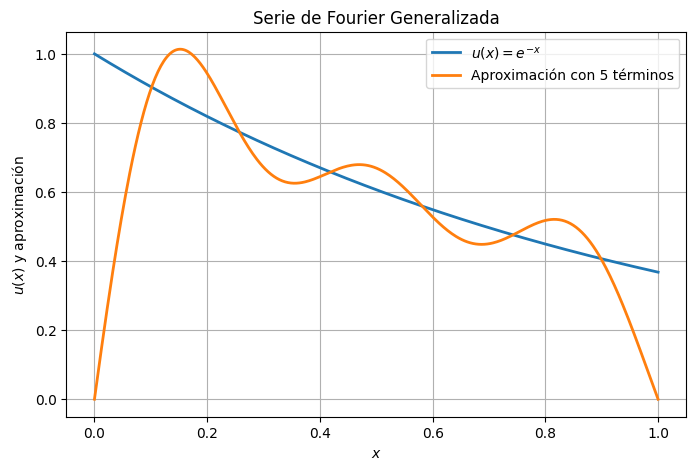

In [10]:
# Importar librerías
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# =======================
# Inciso (a)
# Resolver problema de Sturm-Liouville
# =======================

# Definimos las variables y la función
x, lam = sp.symbols('x lambda', real=True)
f = sp.Function('f')(x)

# Definimos la EDO
edo = sp.Eq(f.diff(x, 2) + 2*f.diff(x) + lam*f, 0)

# Resolver la EDO
sol = sp.dsolve(edo, f)
C1, C2 = sp.symbols('C1 C2')
general_solution = sol.rhs

# Definir raíces de la ecuación característica
r = sp.symbols('r')
char_eq = sp.Eq(r**2 + 2*r + lam, 0)
roots = sp.solve(char_eq, r)

# Suponemos λ > 1 (raíces complejas) → λ = 1 + μ², μ > 0
mu = sp.symbols('mu', positive=True, real=True)
lam_sub = 1 + mu**2

# Sustituyendo en la solución general
f_sol = sp.exp(-x) * (C1 * sp.cos(mu * x) + C2 * sp.sin(mu * x))

# Condiciones de frontera
eq1 = sp.Eq(f_sol.subs(x,0), 0)
eq2 = sp.Eq(f_sol.subs(x,1), 0)

# Aplicar f(0)=0 → C1 = 0
C1_sol = 0
f_sol = sp.exp(-x) * (C2 * sp.sin(mu * x))

# Condición f(1)=0 → sin(mu) = 0 → mu = n*pi
n = sp.symbols('n', integer=True, positive=True)
mu_n = n * sp.pi
lam_n = 1 + (n * sp.pi)**2

# Autofunción f_n(x)
fn = sp.exp(-x) * sp.sin(n * sp.pi * x)

# =======================
# Inciso (b)
# Expansión en serie de Fourier generalizada
# =======================

# Definir u(x) y peso r(x)
u = sp.exp(-x)
r = sp.exp(2*x)

# Cálculo de coeficientes c_n
numerador = sp.integrate(u * fn * r, (x, 0, 1))
denominador = sp.integrate(fn**2 * r, (x, 0, 1))
cn = sp.simplify(numerador / denominador)

# Mostrar expresión de c_n
print("Coeficiente c_n:")
sp.pprint(cn)

# ================
# Graficar función original y aproximación de Fourier
# ================

# Convertimos a funciones numéricas
u_lambd = sp.lambdify(x, u, 'numpy')

def f_numerica(n_val, x_vals):
    # Indented this line to be inside the function body
    return np.exp(-x_vals) * np.sin(n_val * np.pi * x_vals)

def c_numerico(n_val):
    expr = cn.subs(n, n_val)
    return float(expr.evalf())

# Dominio x
x_vals = np.linspace(0, 1, 400)
u_vals = u_lambd(x_vals)

# Aproximación de la serie (N términos)
N = 5
approx_vals = np.zeros_like(x_vals)

for k in range(1, N+1):
    # Indented these lines to be inside the for loop
    ck = c_numerico(k)
    fk = f_numerica(k, x_vals)
    approx_vals += ck * fk

# Graficar
plt.figure(figsize=(8,5))
plt.plot(x_vals, u_vals, label=r'$u(x) = e^{-x}$', linewidth=2)
plt.plot(x_vals, approx_vals, label=f'Aproximación con {N} términos', linestyle='-', linewidth=2)
plt.xlabel('$x$')
plt.ylabel('$u(x)$ y aproximación')
plt.title('Serie de Fourier Generalizada')
plt.legend()
plt.grid(True)
plt.show()


